<a href="https://colab.research.google.com/github/pratikjori20/Appliance-Energy-Prediction/blob/main/Individual_capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <B> Appliance Energy Prediction
Data-driven prediction of energy use of appliances
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

In [60]:
# Import all necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
path = "/content/drive/MyDrive/Copy of data_application_energy.csv"
df = pd.read_csv(path, parse_dates=['date'])

In [63]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [64]:
df.shape

(19735, 29)

In [65]:
df_1 = df
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [66]:
# Set the date index
df = df.set_index('date')

In [67]:
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday
df['Hour'] = df.index.hour
df['Week'] = df.index.week

In [68]:
df.head(10)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month,Weekday,Hour,Week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,...,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,1,0,17,2
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,...,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,1,0,17,2
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,...,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,1,0,17,2
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,...,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,1,0,17,2
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,...,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,1,0,17,2
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,...,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,1,0,17,2
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,...,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,1,0,18,2
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,...,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,1,0,18,2
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,...,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,1,0,18,2


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [70]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month,Weekday,Hour,Week
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,3.101647,2.977249,11.502002,11.393615
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,1.339200,1.985617,6.921953,5.657985
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,1.000000,0.000000,0.000000,2.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,2.000000,1.000000,6.000000,6.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,3.000000,3.000000,12.000000,11.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,4.000000,5.000000,17.000000,16.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,5.000000,6.000000,23.000000,21.000000


In [71]:
df.shape

(19735, 32)

In [72]:
# Checking for null values

df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
Month          0
Weekday        0
Hour           0
Week           0
dtype: int64

In [ ]:
visData = go.Scatter(x = df_1.date, mode = 'lines', y = df_1.Appliances)
layout = go.Layout(title = 'Appliance energy consumption measurement', xaxis = dict(title='Date'), yaxis = dict(title='Wh'))
fig = go.Figure(data = [visData], layout=layout)
iplot(fig)

In [74]:
df_1['WEEKDAY'] = ((pd.to_datetime(df_1['date']).dt.dayofweek)// 5 == 1).astype(float)
df_1['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

In [ ]:
a_weekday = df_1[df_1['WEEKDAY'] == 0]
visData = go.Scatter(x = a_weekday.date, mode = "lines", y = a_weekday.Appliances)
layout = go.Layout(title = 'Appliance Energy Consumption Measurment on Weekdays', xaxis = dict(title='Date'), yaxis = dict(title='Wh'))
fig = go.Figure(data = [visData], layout=layout)
iplot(fig)

In [ ]:
a_weekend = df_1[df_1['WEEKDAY'] == 1]
visData = go.Scatter(x = a_weekend.date, mode = "lines", y = a_weekend.Appliances)
layout = go.Layout(title = 'Appliance Energy Consumption Measurment on Weekends', xaxis = dict(title='Date'), yaxis = dict(title='Wh'))
fig = go.Figure(data = [visData], layout=layout)
iplot(fig)

In [77]:
def daily(x, energy_df=df):
  return energy_df.groupby('Weekday')[x].mean()

def hourly(x, energy_df=df):
  return energy_df.groupby('Hour')[x].mean()

def monthly_daily(x, energy_df=df):
  by_day = energy_df.pivot_table(index='Weekday', columns=['Month'], values=x, aggfunc='mean')
  return round(by_day, ndigits=2)

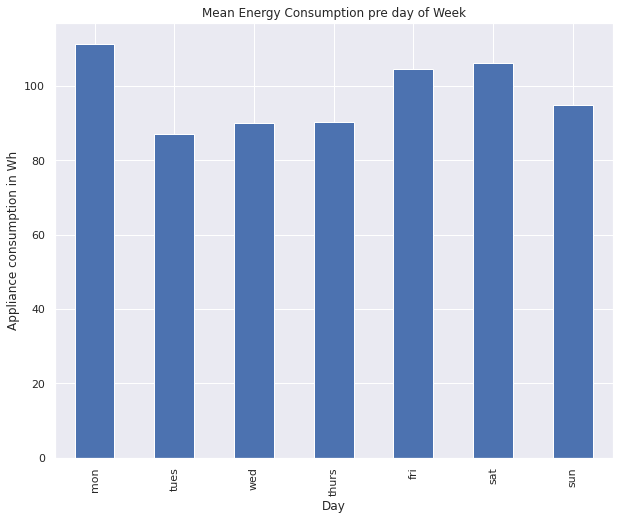

In [78]:
daily('Appliances').plot(kind = 'bar', figsize = (10,8))
ticks = list(range(0,7,1))
labels = "mon tues wed thurs fri sat sun".split()
plt.xlabel('Day')
plt.ylabel('Appliance consumption in Wh')
plt.title('Mean Energy Consumption pre day of Week')
plt.xticks(ticks, labels);

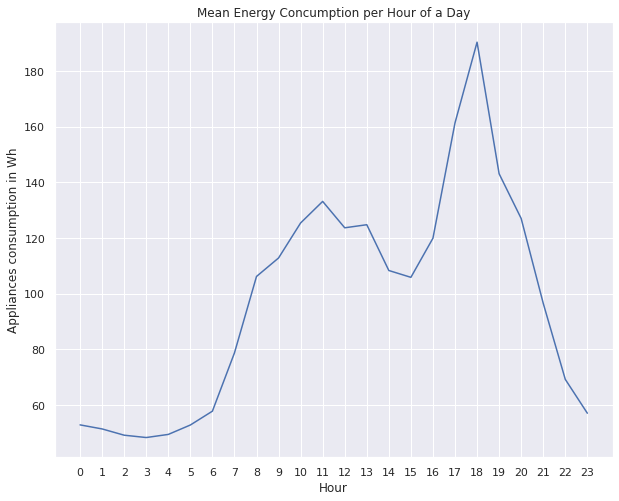

In [79]:
hourly('Appliances').plot(figsize = (10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0,24,1))
plt.title('Mean Energy Concumption per Hour of a Day')
plt.xticks(ticks);

In [80]:
fig, ax = plt.subplot(2,2, figsize=(14,8))
ax = ax.flatten()
months =['jan', 'feb', 'mar', 'april']
for i in range(1,5):
  df.query(f"month == {i}")[['day','Appliances']].groupby('day')['Appliances'].sum().plot.bar(ax=ax[i-1], title = months[i-1])

plt.suptitle('Daily Energy Usage of Appliances - Jan to May')
plt.tight_layout()
plt.show()

plt.figure(figsize = (18,6))
df.query("month == 5")[['day','Appliances']].groupby('day')['Appliances'].sum().plot.bar(title = 'May')
plt.show()

ValueError: ignored

<Figure size 720x576 with 0 Axes>

The number of the 0, 1% top values of appliances' load is 19 and they have power load higher than 790 Wh


Text(0.5, 1.0, 'Appliances energy consumption distribution')

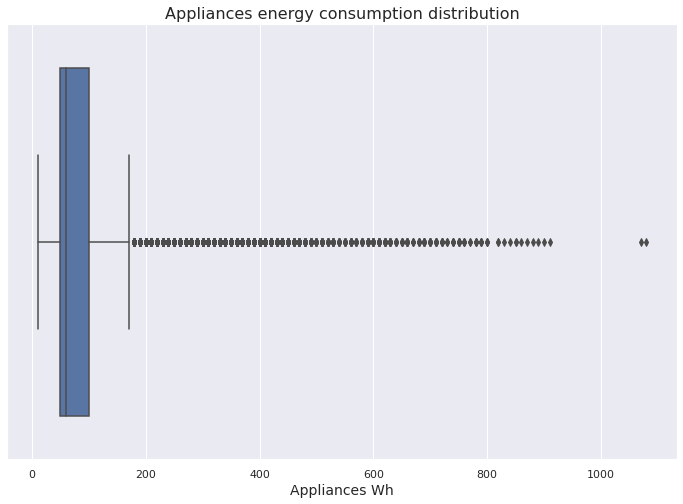

In [81]:
sorted_appliances = df.sort_values('Appliances', ascending = False)
print("The number of the 0, 1% top values of appliances' load is", len(sorted_appliances.head(len(sorted_appliances)//1000)), "and they have power load higher than", sorted_appliances.Appliances[19], "Wh")

plt.figure(figsize =(12,8))
sns.boxplot(x='Appliances', data=df)
plt.xlabel('Appliances Wh', fontsize=14)
plt.title('Appliances energy consumption distribution', fontsize=16)

In [82]:
drop_df = df.drop(df[(df.Appliances>790)|(df.Appliances<0)].index)
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19718 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19718 non-null  int64  
 1   lights       19718 non-null  int64  
 2   T1           19718 non-null  float64
 3   RH_1         19718 non-null  float64
 4   T2           19718 non-null  float64
 5   RH_2         19718 non-null  float64
 6   T3           19718 non-null  float64
 7   RH_3         19718 non-null  float64
 8   T4           19718 non-null  float64
 9   RH_4         19718 non-null  float64
 10  T5           19718 non-null  float64
 11  RH_5         19718 non-null  float64
 12  T6           19718 non-null  float64
 13  RH_6         19718 non-null  float64
 14  T7           19718 non-null  float64
 15  RH_7         19718 non-null  float64
 16  T8           19718 non-null  float64
 17  RH_8         19718 non-null  float64
 18  T9         

In [96]:
# drop_df = drop_df.drop('Month', axis=1)
# drop_df = drop_df.drop('Weekday', axis=1)
drop_df = drop_df.drop('Week', axis=1)

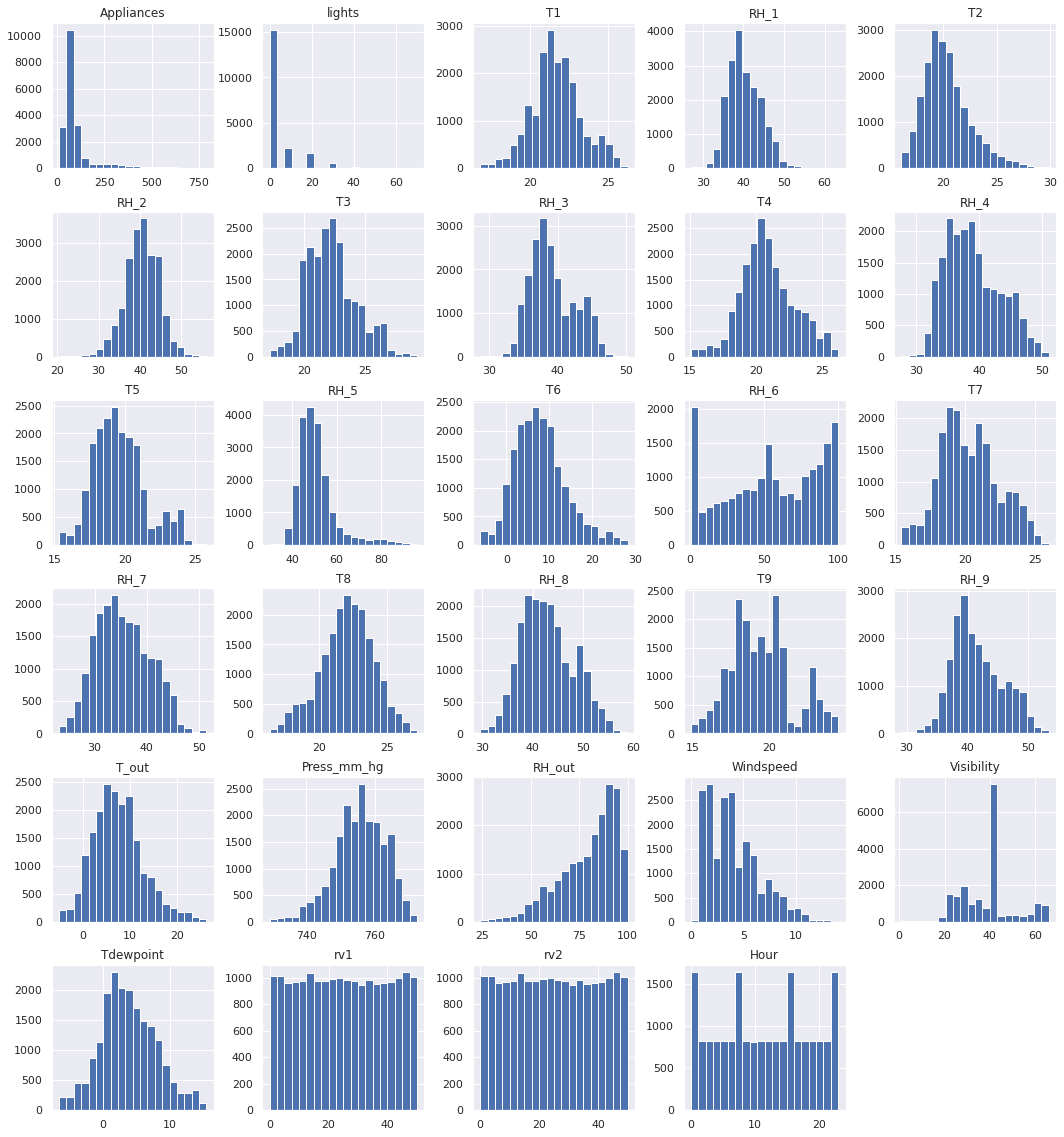

In [99]:
drop_df.hist(bins = 20, figsize = (18,20));

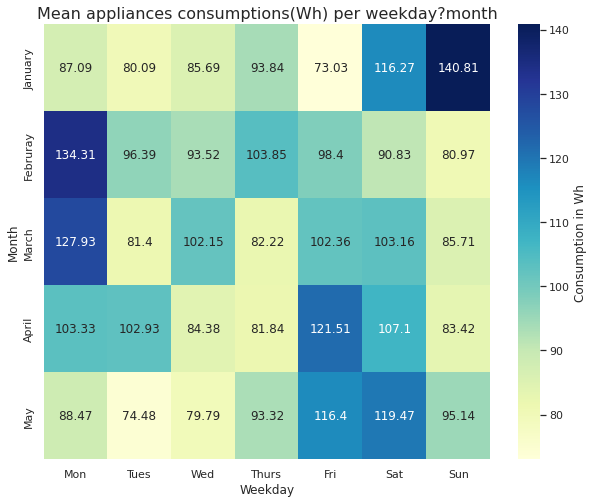

In [112]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.heatmap(monthly_daily('Appliances').T,cmap='YlGnBu',
                 xticklabels= 'Mon Tues Wed Thurs Fri Sat Sun'.split(),
                 yticklabels= 'January Februray March April May'.split(),
                 annot=True, fmt='g',
                 cbar_kws= {'label': 'Consumption in Wh'}).set_title('Mean appliances consumptions(Wh) per weekday?month').set_fontsize('16')
plt.show()